<a href="https://colab.research.google.com/github/emrahyurtlu/Intro-to-tensorflow-for-deep-learning/blob/main/CMPE430/LAB_6_Stochastic_Gradient_Descent_and_Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CMPE430 LAB WEEK 6 - Stochastic Gradient Descent and Learning Rate**

25.11.2021 Thursday 14:30-16:20

Lab Assistant : Cansen Çağlayan (cansen.caglayan@atilim.edu.tr)

**References**

Book : Deep Learning with Python, François Chollet

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

https://medium.com/deep-learning-turkiye/derin-ogrenme-uygulamalarinda-en-sik-kullanilan-hiper-parametreler-ece8e9125c4



In [ ]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import make_blobs
from matplotlib import pyplot

##**Training**

Each neural layer from our first network example transforms its input data as follows:

**output = relu(dot(W, input) + b)**

In this expression, **W** and **b** are tensors that are attributes of the layer. They’re called the **weights** or **trainable parameters** of the layer (the kernel and bias attributes, respectively). 

**These weights contain the information learned by the network from exposure
to training data.**

Initially, these weight matrices are filled with **small random values** (a step called random initialization).


What comes next is to gradually adjust these weights, based on a **feedback signal**. This gradual adjustment, **also called training**, is basically the learning that machine learning is all about.

This happens within what’s called a training loop, which works as follows. 

Repeat these steps in a loop, as long as necessary:

1. Draw a batch of training samples x and corresponding targets y.
2. Run the network on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the network on the batch, a measure of the mismatch
between y_pred and y.
4. Update all weights of the network in a way that slightly reduces the loss on this batch.

Note : “Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.”

“Stochastic”, in plain terms means “random”.

Where can we potentially induce randomness in our gradient descent algorithm??

It is while selecting data points at each step to calculate the derivatives.

SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.

It is also common to sample a small number of data points instead of just one point at each step and that is called “mini-batch” gradient descent. Mini-batch tries to strike a balance between the goodness of gradient descent and speed of SGD.

##**Learning Rate**

* The weights of a neural network cannot be calculated using an analytical method. Instead, the weights must be discovered via an empirical optimization procedure called **stochastic gradient descent (SGD).**




* The amount of change to the model during each step of this search process, or the step size, is called the **“learning rate”** and provides perhaps the most important hyperparameter to tune for your neural network in order to achieve good performance on your problem.

**What Is the Learning Rate?**

* Deep learning neural networks are trained using the stochastic gradient descent algorithm.

* Stochastic gradient descent is an **optimization algorithm** that estimates the error gradient for the current state of the model using examples from the training dataset, **then updates the weights of the model using the back-propagation of errors algorithm**, referred to as simply **backpropagation.**

* The amount that the weights are updated during training is referred to as the **"step"** size or the **“learning rate.”**

* Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between **0.0 and 1.0.**

* During training, the backpropagation of error estimates the amount of error for which the weights of a node in the network are responsible. Instead of updating the weight with the full amount, it is scaled by the learning rate.

This means that a learning rate of **0.1**, a traditionally common default value, would mean that weights in the network are updated 

0.1 * (estimated weight error) or 10% of the estimated weight error each time the weights are updated.

The learning rate hyperparameter controls the rate or speed at which the model learns. Specifically, it controls the amount of apportioned error that the weights of the model are updated with each time they are updated, such as at the end of each batch of training examples.

* Generally, a large learning rate allows the model to learn faster, at the cost of arriving on a sub-optimal final set of weights. 

* A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train.

It is important to find a good value for the learning rate for your model on your training dataset.

**Unfortunately, we cannot analytically calculate the optimal learning rate for a given model on a given dataset. Instead, a good (or good enough) learning rate must be discovered via trial and error.**

---------------------------------------------------------

**NOT :** Derin öğrenmede parametrelerin güncellenmesi geriyeyayılım (“backpropagation”) işlemi ile yapılmaktadır. Backpropagation işleminde bu güncelleme işi “chain rule” olarak adlandırılan geriye doğru türev alarak farkın bulunması ve bulunan fark değerinin **“learning rate”** parametresiyle çarpılması, çıkan sonucun ağırlık değerlerinden çıkarılarak yeni ağırlık değerinin hesaplanmasıyla yapılmaktadır.

**Stochastic Gradient Descent**

Keras provides the SGD class that implements the stochastic gradient descent optimizer with a learning rate and momentum.

First, an instance of the class must be created and configured, then specified to the “optimizer” argument when calling the fit() function on the model.

**The default learning rate is 0.01 and no momentum is used by default.**

In [ ]:
from keras.optimizers import SGD
...
opt = SGD()
model.compile(..., optimizer=opt)

The learning rate can be specified via the **“lr”** argument and the momentum can be specified via the **“momentum”** argument.

In [ ]:
from keras.optimizers import SGD
...
opt = SGD(lr=0.01, momentum=0.9)
model.compile(..., optimizer=opt)

# **Example : Multi-Class Classification Problem**

We will use a small multi-class classification problem as the basis to demonstrate the **effect of learning rate on model performance**.

The scikit-learn class provides the **make_blobs()** function that can be used to create a **multi-class classification problem with the prescribed number of samples**, input variables, classes, and variance of samples within a class.

The problem has two input variables (to represent the x and y coordinates of the points) and a standard deviation of 2.0 for points within each group.

We will use the same random state (seed for the pseudorandom number generator) to ensure that we always get the same data points.

## Creating a Dataset
Running the example creates a scatter plot of the entire dataset. We can see that the standard deviation of 2.0 means that the classes are not linearly separable (separable by a line), causing many ambiguous points.

This is desirable as it means that the problem is non-trivial and will allow a neural network model to find many different “good enough” candidate solutions.

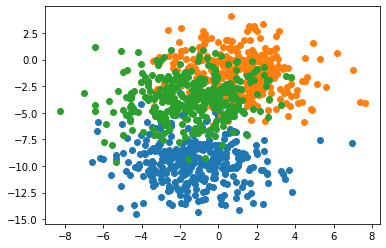

In [ ]:
# scatter plot of blobs dataset
from numpy import where
# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
	# select indices of points with the class label
	row_ix = where(y == class_value)
	# scatter plot for points with a different color
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show plot
pyplot.show()

In [ ]:
X.shape

(1000, 2)

In [ ]:
y.shape

(1000,)

##Preparing the Data

The first step is to develop a function that will create the samples from the problem and **split them into train and test datasets**.

Additionally, we must also **one hot encode the target variable** so that we can develop a model that predicts the probability of an example belonging to each class.

**The prepare_data() function below implements this behavior, returning train and test sets split into input and output elements.**

In [ ]:
# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

In [ ]:
trainX, trainy, testX, testy = prepare_data()

## Model Definition & Compilation

* First, we will define a simple model that expects two input variables from the blobs problem, has a single hidden layer with 50 nodes, and an output layer with three nodes to predict the probability for each of the three classes. Nodes in the hidden layer will use the rectified linear activation function **(ReLU)**, whereas nodes in the output layer will use the **softmax activation function.**

* We will use the stochastic gradient descent optimizer and require that the learning rate be specified so that we can evaluate different rates. The model will be trained to minimize cross entropy.

default learning rate = 0.01 and no momentum

Where lrate is the learning rate for the current epoch, initial_lrate is the learning rate specified as an argument to SGD

* A loss function—How the network will be able to measure its performance on
the training data, and thus how it will be able to steer itself in the right direction.

* An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function

In [ ]:
def fit_model(trainX, trainy, testX, testy, lrate):
	# define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
 
	# compile model
	opt = SGD(learning_rate=lrate)
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
 
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=200, verbose=0)
 
	# plot learning curves
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.title('lrate='+str(lrate), pad=-50)

The model will be fit for 200 training epochs, found with a little trial and error, and the test set will be used as the validation dataset so we can get an idea of the generalization error of the model during training.

The fit_model() function below ties together these elements and will fit a model and plot its performance given the train and test datasets as well as a specific learning rate to evaluate.

## Different Learning Rates
We can now investigate the dynamics of different learning rates on the train and test accuracy of the model.

In this example, we will evaluate learning rates on a logarithmic scale from 1E-0 (1.0) to 1E-7 and create line plots for each learning rate by calling the fit_model() function.

* 1E-0 ==   1.0

* 1E-1 ==   0.1 

* 1E-2 ==   0.01 

* 1E-3 ==   0.001

* 1E-4 ==   0.0001




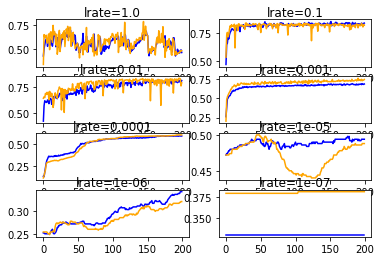

In [ ]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
	# determine the plot number
	plot_no = 420 + (i+1)
	pyplot.subplot(plot_no)
	# fit model and plot learning curves for a learning rate
	fit_model(trainX, trainy, testX, testy, learning_rates[i])
# show learning curves
pyplot.show()

* Running the example creates a single figure that contains eight line plots for the eight different evaluated learning rates. 

* Classification accuracy on the **training dataset is marked in blue**, whereas **accuracy on the test dataset is marked in orange**.

* The plots show oscillations in behavior for the too-large learning rate of 1.0 and the inability of the model to learn anything with the too-small learning rates of 1E-6 and 1E-7.

* We can see that the model was able to learn the problem well with the learning rates 1E-1, 1E-2 and 1E-3, although successively slower as the learning rate was decreased. With the chosen model configuration, the results suggest a moderate learning rate of 0.1 results in good model performance on the train and test sets.



**NOT :**

* Learning Rate'in yüksek olması salınıma (oscillations) neden olacaktır. Buna karşı küçük olması da küçük adımlarla ilerleyeceğinden öğrenimin çok uzun sürmesine neden olacaktır.
* Learning Rate için en uygun çözüm başlangıçta öğrenme hızı yüksek tutmak, gittikçe azaltmaktır.
* Learning Rate başlangıçta çok küçük olması, lokal optimum değere takılarak, global optimum değere hiç ulaşılamamasına neden olabilir.
* Learning Rate değeri genelde varsayılan değer olarak 0.01 kullanılmakta belli bir epoch’dan sonra 0.001'e düşürülmektedir.

##**Adaptive Learning Rate Gradient Descent**
Keras also provides a suite of extensions of simple stochastic gradient descent that support adaptive learning rates.

Because each method adapts the learning rate, often one learning rate per model weight, little configuration is often required.

Two commonly used adaptive learning rate methods include:

In [ ]:
#RMSProp Optimizer
from keras.optimizers import RMSprop
...
opt = RMSprop()
model.compile(..., optimizer=opt)

In [ ]:
#Adam Optimizer
from keras.optimizers import Adam
...
opt = Adam()
model.compile(..., optimizer=opt)

Note : Momentum can smooth the progression of the learning algorithm that, in turn, can accelerate the training process.

#**Learning Rates with MNIST Dataset**

In [ ]:
#Load the Dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
my_model = models.Sequential()
my_model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
my_model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Summarize the Model
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


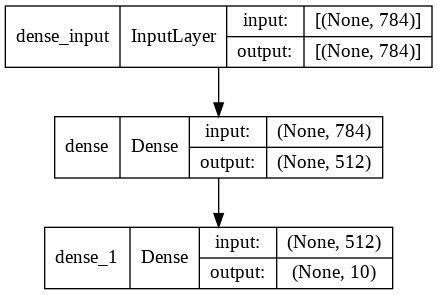

In [ ]:
#Plot the Model
from tensorflow.keras.utils import plot_model
plot_model(my_model, to_file='my_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
opt = SGD(learning_rate=0.1)
my_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#We also need to categorically encode the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 10 classes.

**NOT :**
Model eğitilirken verilerin tamamı aynı anda eğitime katılmaz. Belli sayıda parçalar halinde eğitimde yer alırlar. İlk parça eğitilir, modelin başarımı test edilir, başarıma göre geriyeyayılım (“backpropagation”) ile ağırlıklar güncellenir. Daha sonra yeni eğitim kümesi ile model tekrar eğitilip ağırlıklar tekrar güncellenir. Bu işlem her bir eğitim adımında tekrarlanarak model için en uygun ağırlık değerleri hesaplanmaya çalışılır. Bu eğitim adımlarının her birine “epoch” denilmektedir.

In [ ]:
history = my_model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.4369 - accuracy: 0.8836
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2451 - accuracy: 0.9310
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1944 - accuracy: 0.9452
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1626 - accuracy: 0.9548
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1393 - accuracy: 0.9613


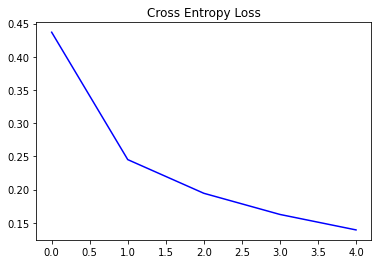

In [ ]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.show()

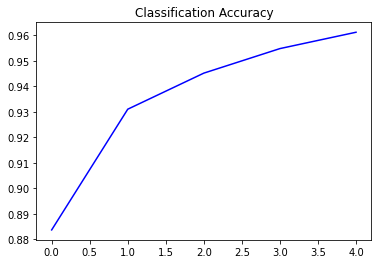

In [ ]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.show()

In [ ]:
#Evaluate the Loaded Model
test_loss, test_acc = my_model.evaluate(test_images, test_labels, verbose=0)
#print('test_acc:', test_acc)
print('test_loss:', test_loss)
print('> test_acc: %.3f' % (test_acc * 100.0))

test_loss: 0.13228949904441833
> test_acc: 96.160


**Change the Learning Rate Value**

In [ ]:
my_model2 = models.Sequential()
my_model2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
my_model2.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt2 = SGD(learning_rate=0.000001)
my_model2.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = my_model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 2.3755 - accuracy: 0.0994
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3747 - accuracy: 0.0996
Epoch 3/5
469/469 [==============================] - 4s 7ms/step - loss: 2.3739 - accuracy: 0.0998
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 2.3731 - accuracy: 0.1001
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 2.3723 - accuracy: 0.1003


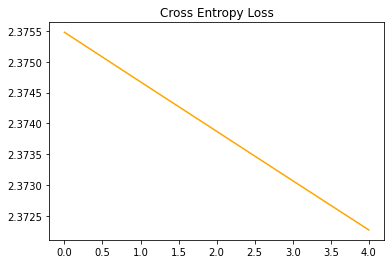

In [ ]:
# plot loss
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='orange', label='train')
plt.show()

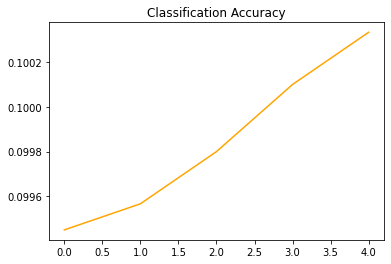

In [ ]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='train')
plt.show()

In [ ]:
#Evaluate the Loaded Model
test_loss2, test_acc2 = my_model2.evaluate(test_images, test_labels, verbose=0)
#print('test_acc:', test_acc2)
print('test_loss2:', test_loss2)
print('> test_acc2: %.3f' % (test_acc2 * 100.0))

test_loss2: 2.377464532852173
> test_acc2: 9.870
